In [180]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
import keras

In [182]:
keras.backend.backend()

'tensorflow'

# Import the Fashion MNIST dataset

**The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.**

In [183]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Explore the data

**Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images**

In [184]:
x_train.shape

(60000, 28, 28)

In [185]:
x_test.shape

(10000, 28, 28)

**Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:**

In [186]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data

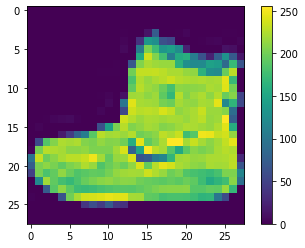

In [187]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [188]:
class_names[y_train[0]]

'Ankle boot'

Scale these values to a range of 0 to 1

In [189]:
x_train = x_train / 255.0
x_test = x_test / 255.0

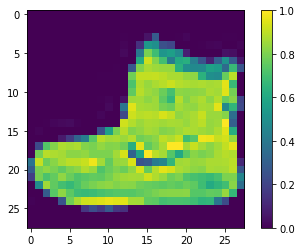

In [190]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

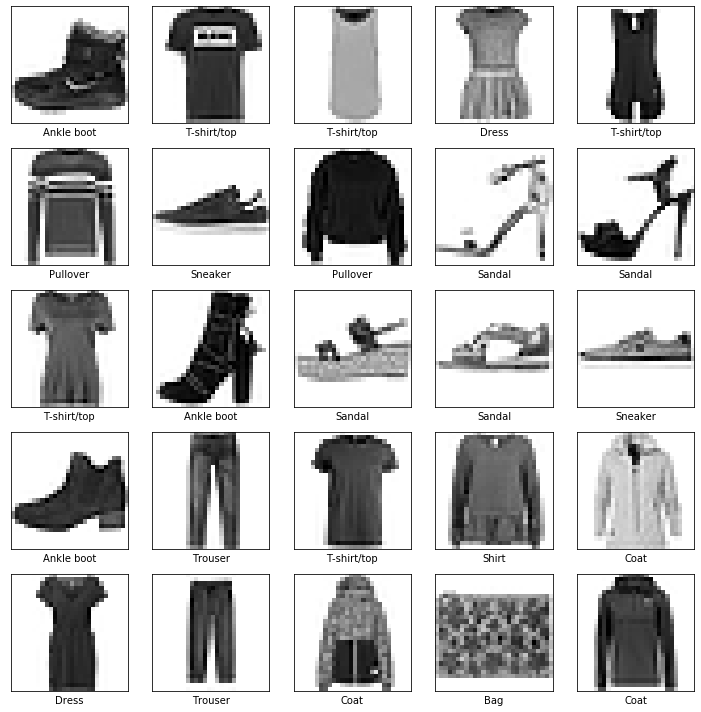

In [213]:
plt.figure(figsize=(10,10)) # define figure size
for i in range(25):
    plt.subplot(5,5,i+1)    # draw 1 images shape
    plt.xticks([])          # remove x label
    plt.yticks([])          # remove y label
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()

# Build Model

In [192]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

**Set up the layers:**

In [193]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))         # input layer - Flatten - > Transform 2D array to 1D array
model.add(Dense(128, activation='relu'))         # hidden layer - 128 nodes (or neurons)
model.add(Dense(10, activation='softmax'))                             # output layer - Outputs
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Compile the model:**

In [194]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

**Train the model:**

In [195]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.4956 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3742 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3368 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3126 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2946 - accuracy: 0.8904
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2783 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2670 - accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.2561 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2470 - accuracy: 0.9081
Epoch 10/10
60000/60000 [====================

**Prediction:**

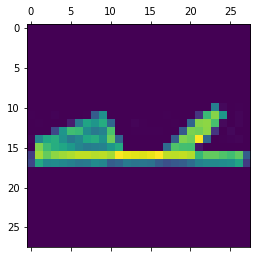

In [196]:
plt.matshow(x_test[111])

In [197]:
yp = model.predict(x_test)

In [198]:
yp[111]

array([5.9693770e-07, 9.9055070e-12, 3.3861969e-08, 5.6019918e-11,
       6.9932344e-07, 9.9998128e-01, 1.6571130e-07, 1.5408270e-05,
       1.8427354e-06, 3.0863540e-10], dtype=float32)

In [199]:
class_names[np.argmax(yp[111])]

'Sandal'

In [200]:
class_names[y_test[111]]

'Sandal'

**Score:**

In [201]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_acc))

10000/10000 [==============================] - 1s 76us/step
Test accuracy: 0.8855000138282776


# Verify Prediction

In [210]:
def plt_img(i):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    prediction_label = np.argmax(yp[i])
    if prediction_label == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    acc = np.max(yp[i])
    plt.xlabel("{}, {:2.0f}% ({})".format(class_names[prediction_label], 100*acc, class_names[y_test[i]]), color=color)
    
def plt_value_array(i):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    bar = plt.bar(range(10), yp[i], color="#777777")
    predicted = np.argmax(yp[i])
    t = y_test[i]
    bar[predicted].set_color('red')
    bar[t].set_color('blue')

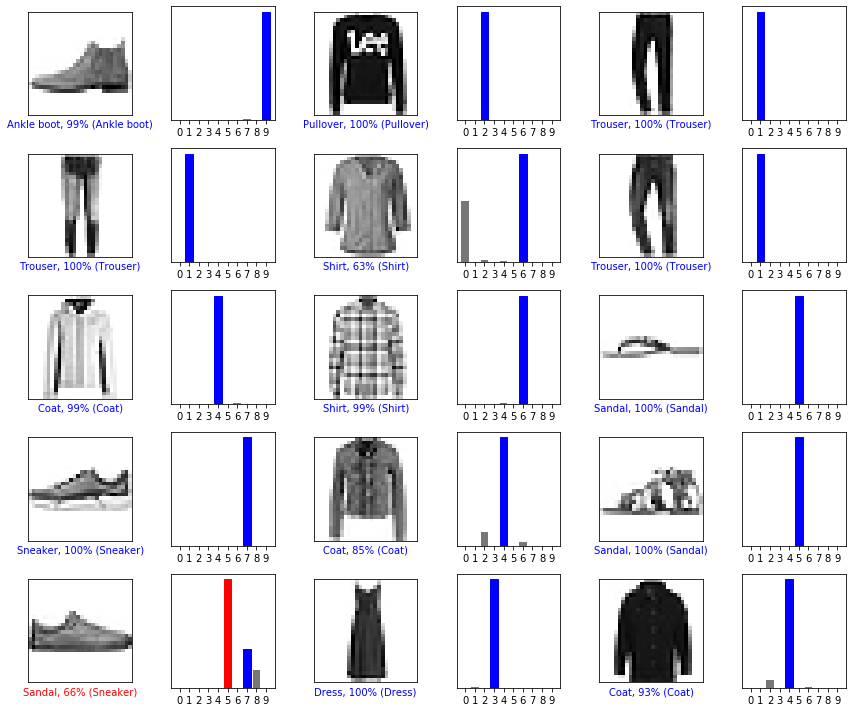

In [211]:
n = 5
m = 3
images = n*m
plt.figure(figsize=(2*2*m, 2*n))

for i in range(images):
    plt.subplot(n, 2*m, 2*i+1)
    plt_img(i)
    plt.subplot(n, 2*m, 2*i+2)
    plt_value_array(i)
plt.tight_layout()
plt.show()